# Information About Working


The Data set which used is Sindh-School-Enrollment-Stats after seen it with quite detail and try to find the best usefull data
from It I have decided to use it to predicte the number of teacher required for a gaven amount of students and institution. I have tried to explain the working and did my best to perform all the task

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # all the required libaries are Imported for working 

In [2]:
df = pd.read_csv('Downloads//sindh-school-enrollment-stats.csv')# 1 panda function used
df.head()

,District,Location,School Type,Category,Composition,Number,Population,No/100000
0,Badin,Urban,Primary,INSTITUTIONS,TOTAL,168,"1,804,516",9.309976
1,Badin,Urban,Primary,INSTITUTIONS,MALE,30,"1,804,516",1.662496
2,Badin,Urban,Primary,INSTITUTIONS,FEMALE,27,"1,804,516",1.496246
3,Badin,Urban,Primary,INSTITUTIONS,MIXED,111,"1,804,516",6.151234
4,Badin,Urban,Primary,ENROLMENT,TOTAL,16446,"1,804,516",911.380115


Now We start cleaning and removing all the data which is not requried for prediction .

In [3]:
df1 = df.drop(['Population', 'No/100000'], axis=1)#2 function is used of panda

In [4]:
df1.head()

,District,Location,School Type,Category,Composition,Number
0,Badin,Urban,Primary,INSTITUTIONS,TOTAL,168
1,Badin,Urban,Primary,INSTITUTIONS,MALE,30
2,Badin,Urban,Primary,INSTITUTIONS,FEMALE,27
3,Badin,Urban,Primary,INSTITUTIONS,MIXED,111
4,Badin,Urban,Primary,ENROLMENT,TOTAL,16446


In [5]:
A_filter = (df1['Category'] == 'INSTITUTIONS') & (df1['Composition'] == 'TOTAL')
df2 = df1[A_filter]
s=np. arange(348)#1 numpy function used
df2.set_index(s, inplace=True)

In [6]:
A_filter = (df1['Category'] == 'TEACHING STAFF') & (df1['Composition'] == 'TOTAL')
df3 = df1[A_filter]
df3.set_index(s, inplace=True)


In [7]:
A_filter = (df1['Category'] == 'ENROLMENT') & (df1['Composition'] == 'TOTAL')
df4 = df1[A_filter]
df4.set_index(s, inplace=True)


In [8]:
df5 = df1.drop(['Category', 'Composition', 'Number','School Type'], axis=1)
print(df5.head())

df5['INSTITUTION'] = df2['Number']
df5['TEACHING'] = df3['Number']
df5['ENROLLMENTS'] = df4['Number']
#droping columns and adding the required onces

  District Location
0    Badin    Urban
1    Badin    Urban
2    Badin    Urban
3    Badin    Urban
4    Badin    Urban


In [9]:
df5.head()

,District,Location,INSTITUTION,TEACHING,ENROLLMENTS
0,Badin,Urban,168.0,550.0,16446.0
1,Badin,Urban,10.0,47.0,973.0
2,Badin,Urban,8.0,380.0,10738.0
3,Badin,Urban,7.0,288.0,8901.0
4,Badin,Urban,2595.0,3706.0,123716.0


In [10]:
df6=df5.dropna(how='any')# final datafram which is going to be used to apply the graphics and models

In [11]:
df6.head()

,District,Location,INSTITUTION,TEACHING,ENROLLMENTS
0,Badin,Urban,168.0,550.0,16446.0
1,Badin,Urban,10.0,47.0,973.0
2,Badin,Urban,8.0,380.0,10738.0
3,Badin,Urban,7.0,288.0,8901.0
4,Badin,Urban,2595.0,3706.0,123716.0


# Matplotlib

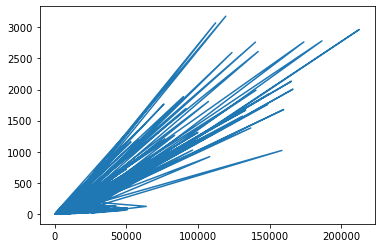

In [12]:
xaxis=df6['INSTITUTION']
yaxis=df6['ENROLLMENTS']
plt.plot(yaxis, xaxis)
plt.show()


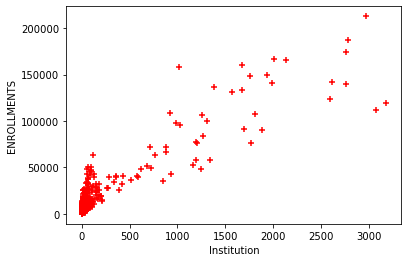

In [13]:
plt.xlabel('Institution')
plt.ylabel('ENROLLMENTS')
plt.scatter(df6.INSTITUTION, df6.ENROLLMENTS, color='red', marker='+')
plt.show()

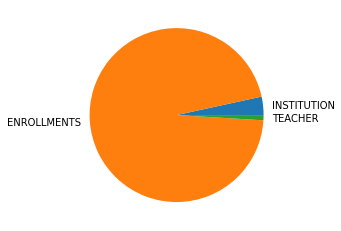

In [14]:
y = df6['TEACHING'].sum()
x= df6['ENROLLMENTS'].sum()
z= df6['INSTITUTION'].sum()
t=np.array([y,x,z])#numpy second function is used 
mylabels = ["INSTITUTION", "ENROLLMENTS", "TEACHER",]

plt.pie(t,labels=mylabels)
plt.show() 

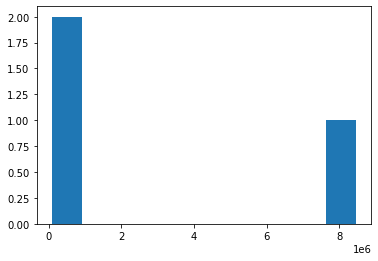

In [15]:
y = df6['TEACHING'].sum()
x= df6['ENROLLMENTS'].sum()
z= df6['INSTITUTION'].sum()
t=np.array([y,x,z])
plt.hist(t)
plt.show() 

In [62]:
mean=np.mean(y)#3 Function of numpy
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

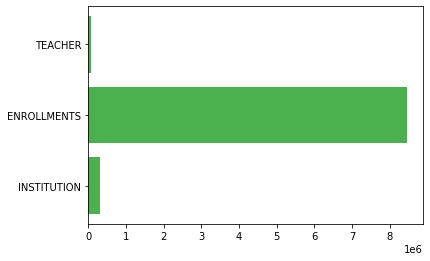

In [16]:
y = df6['TEACHING'].sum()
x= df6['ENROLLMENTS'].sum()
z= df6['INSTITUTION'].sum()
t=np.array([y,x,z])#numpy second function is used 
mylabels = ["INSTITUTION", "ENROLLMENTS", "TEACHER",]
plt.barh(mylabels, t,color = "#4CAF50")
plt.show()

# SEABORN

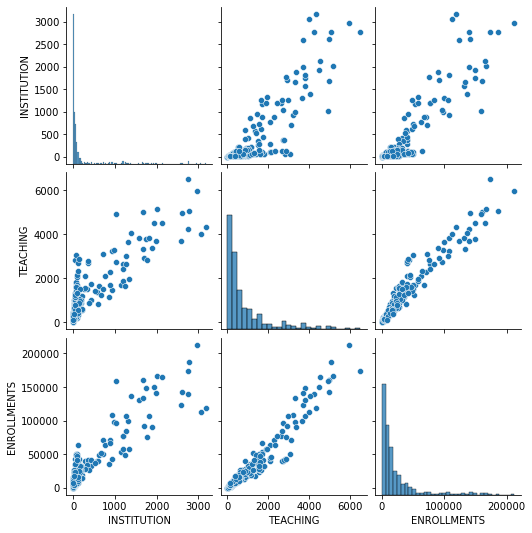

In [17]:
sns.pairplot(df6)#this has 9 and 2 are more gaven so it makes 11

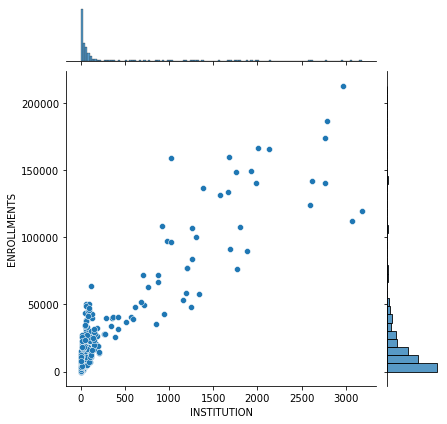

In [18]:
sns.jointplot(x = df6['INSTITUTION'], y = df6['ENROLLMENTS'], kind = 'scatter')

D:\ProgramData\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

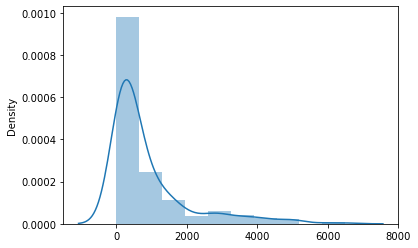

In [19]:
sns.distplot(x = df6['TEACHING'], bins = 10)

In [20]:
from sklearn import linear_model

lr= linear_model.LinearRegression()
X=df6.iloc[:,2].values.reshape(-1,1)
Y=df6.iloc[:,3].values.reshape(-1,1)
lr.fit(X,Y)
a = lr.predict([[200]])
a


array([[789.94627146]])

# Multi Regression

In [21]:
X=df6.drop(['District','Location','TEACHING'],axis=1)
Y=df6['TEACHING']

In [22]:
lr.fit(X,Y)

LinearRegression()

In [23]:
c=lr.intercept_
c

106.66561112182376

In [24]:
m=lr.coef_
m

array([-0.09188168,  0.03218664])

In [25]:
result=lr.predict(X)


In [26]:
result

array([ 620.57090989,  137.06439147,  451.55065828,  392.51568907,
       3850.23455469,  405.10739568,  809.76845602,  197.38158691,
       4364.13985346,  435.50617603, 1154.65350317,  483.23166486,
       1022.22757363,  157.81073718,  554.96688169,  226.83703735,
       4182.47967075,  425.80471515,  884.71298001,  406.02060261,
       5098.04163326,  476.94984121, 1333.01425058,  526.19202884,
       1361.42961078,  679.37571414, 1497.80870646,  664.20364706,
       1094.09339015,  261.63247414,  335.62375079,  227.21392052,
       2348.85738981,  834.34257716, 1726.76684613,  784.75195646,
        266.99472968,  108.90052372,  211.62679308,  138.08444638,
       1710.28292024,  194.87851243,  395.91100353,  196.97719533,
       1870.6120388 ,  197.11342503,  500.87218549,  228.39603059,
        355.71981224,  162.20627166,  315.04713374,  457.14645476,
       1352.47253961,  264.73174769,  556.00733248,  136.99010075,
       1601.52674073,  320.27240823,  764.3888551 ,  487.47094

#  Decision-Tree  Regression

In [27]:
from sklearn.tree import DecisionTreeRegressor
Tree=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)
Tree.fit(X,Y)



DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [28]:
Predict=Tree.predict(X)
Predict

array([ 745.94444444,   45.875     ,  300.71052632,  300.71052632,
       3017.70689655,  465.68518519,  745.94444444,  177.375     ,
       3017.70689655,  465.68518519, 1146.33333333,  300.71052632,
       1146.33333333,   45.875     ,  465.68518519,  177.375     ,
       3017.70689655,  465.68518519, 1146.33333333,  300.71052632,
       3017.70689655,  465.68518519, 1146.33333333,  465.68518519,
       3017.70689655,  745.94444444, 3017.70689655,  745.94444444,
       1146.33333333,  177.375     ,  300.71052632,  177.375     ,
       3017.70689655, 1146.33333333, 3017.70689655,  745.94444444,
        177.375     ,   45.875     ,  177.375     ,   45.875     ,
       3017.70689655,  177.375     ,  465.68518519,  177.375     ,
       3017.70689655,  177.375     ,  465.68518519,  177.375     ,
        465.68518519,   45.875     ,  177.375     ,  300.71052632,
       3017.70689655,  177.375     ,  465.68518519,   45.875     ,
       3017.70689655,  177.375     ,  745.94444444,  300.71052

# RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
 

x= X.iloc [:, : -1] 
y= Y.iloc [:]
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
regressor.fit(x, y) 
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))
Y_pred


D:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([162.6376636])

# SVM

In [30]:
from sklearn.svm import SVR
svm = SVR().fit(X, Y)
svm

result_value = svm.predict(X)
result_value

array([411.21533788, 371.36030404, 393.43013721, 388.3259062 ,
       464.60776776, 390.03870037, 429.92038408, 374.49907217,
       462.45416123, 392.76433503, 463.66261473, 396.32632819,
       452.03695854, 372.37556766, 403.20904305, 376.25166924,
       463.64677029, 391.49862214, 437.78892576, 389.48995983,
       459.00693688, 396.14597464, 477.17513707, 400.41690152,
       480.20200266, 416.18507312, 486.20580904, 414.25288392,
       461.30801097, 378.60664407, 383.80741809, 376.26352303,
       488.18759281, 432.7367668 , 493.43409986, 426.93193203,
       379.03481173, 370.04220205, 375.34977606, 371.36948742,
       494.59952393, 374.54553391, 388.79360737, 374.49175121,
       494.98757955, 374.68976921, 398.21151205, 376.36474619,
       385.5854553 , 372.58769326, 382.24938352, 393.92350486,
       481.21941372, 378.82645742, 403.45572351, 371.31700922,
       491.76623835, 382.79413462, 425.00548743, 396.70158787,
       400.94060388, 370.00305531, 382.24225353, 372.68

# Confusion Matrix plot_confusion_matrix only supports classifiers So I am make an random data set

D:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


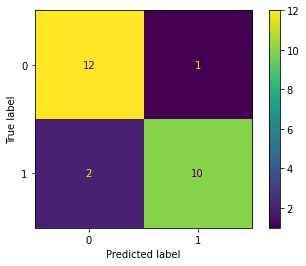

In [55]:

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

# ROC AUC

# An ROC curve shows the TPR as a function of FPR. Neither of these measures exists in the context of regression, so there is no such thing as ROC curves for regression.

# SVC AND LOGISTIC REGRESSION

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)


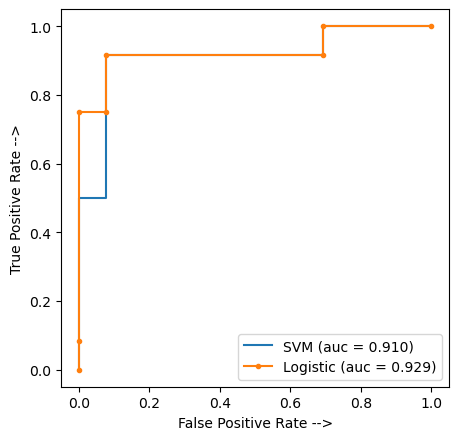

In [61]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()